<a href="https://colab.research.google.com/github/DeF0017/DIgit-Recognizer-using-Neural-Networks/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 2.1 MB/s eta 0:

In [ ]:
import gradio as gr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.activations import linear,relu,sigmoid

In [ ]:
def softmax(z):
  ez=np.exp(z)
  a=ez/np.sum(ez)
  return a

z = np.array([1., 2., 3., 4.])
a = softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


In [ ]:
data = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = data.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)


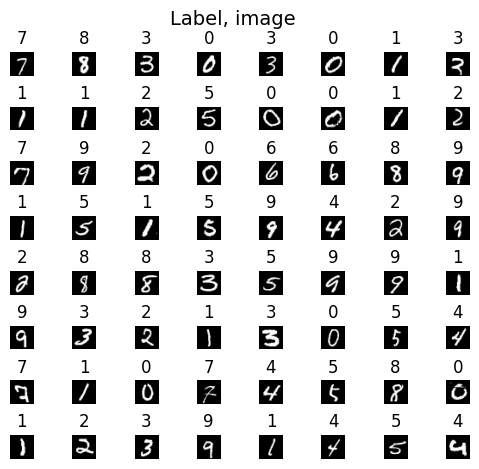

In [ ]:
N,m,n=X_train.shape

fig,axes = plt.subplots(8,8,figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i,ax in enumerate(axes.flat):
  rand_idx=np.random.randint(N)
  X_new=X_train[rand_idx]
  ax.imshow(X_new, cmap="gray")
  ax.set_title(y_train[rand_idx])
  ax.set_axis_off()
  fig.suptitle("Label, image", fontsize=14)

In [ ]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(512,activation="relu",name="L1"),
        tf.keras.layers.Dense(256,activation="relu",name="L2"),
        tf.keras.layers.Dense(128,activation="relu",name="L3"),
        tf.keras.layers.Dense(10,activation="linear",name="L4")
    ] , name="my_model"
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 512)               401920    
                                                                 
 L2 (Dense)                  (None, 256)               131328    
                                                                 
 L3 (Dense)                  (None, 128)               32896     
                                                                 
 L4 (Dense)                  (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train=X_train/255.0

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
)
history=model.fit(
    X_train,y_train,epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 23s 11ms/step - loss: 0.3506
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1377
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0942
Epoch 4/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0698
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0526
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0402
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0309
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0245
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0181
Epoch 10/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0148


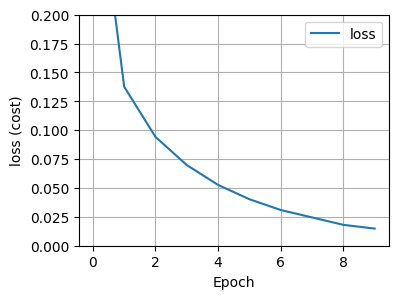

In [ ]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 0.2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

plot_loss_tf(history)

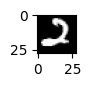

1/1 [==============================] - 0s 111ms/step
[[ 0.8751937 -3.7805758 17.943068   4.000752  -9.981886  -6.9288993
  -9.14601   -2.9021108 -2.620605  -5.800496 ]]
2


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
# Display the image
ax.imshow(X_train[1010], cmap='gray')
plt.show()
predict1=model.predict(X_train[1010].reshape(-1,28,28))
print(predict1)
predict1_idx=np.argmax(predict1)
print(predict1_idx)


In [ ]:
prediction = tf.nn.softmax(predict1)
print(prediction)

tf.Tensor(
[[3.8682682e-08 3.6773995e-10 9.9999917e-01 8.8090422e-07 7.4532633e-13
  1.5784886e-11 1.7193448e-12 8.8522484e-10 1.1730321e-09 4.8786600e-11]], shape=(1, 10), dtype=float32)


In [ ]:
yhat = np.argmax(prediction)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 [==============================] - 0s 28ms/step


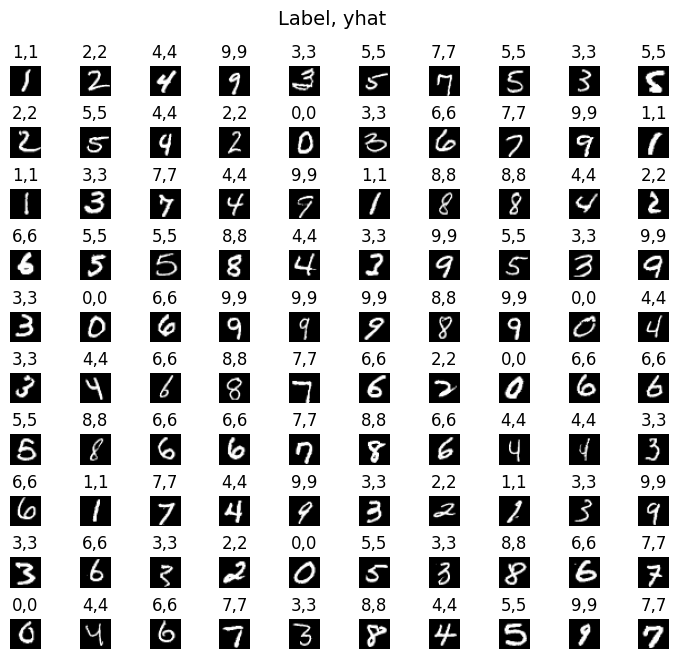

In [ ]:
N,m,n=X_train.shape

fig,axes=plt.subplots(10,10,figsize=(7,7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
for i,ax, in enumerate(axes.flat):
  rand_idx =  np.random.randint(N);
  y_hat=np.argmax(tf.nn.softmax(model.predict(X_train[rand_idx].reshape(-1,28,28))))
  ax.imshow(X_train[rand_idx],cmap="gray")
  ax.set_title(f"{y_train[rand_idx]},{y_hat}")
  ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

1/1 [==============================] - 0s 26ms/step


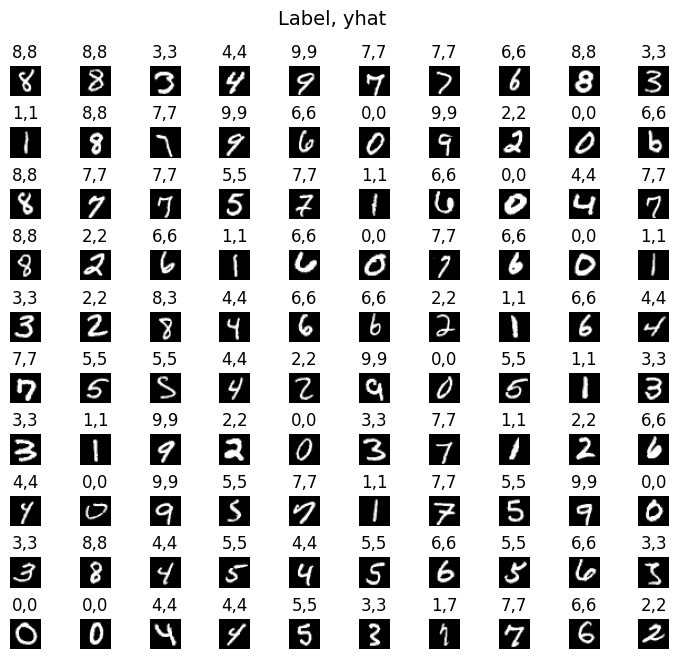

In [ ]:
X_test=X_test/255.0
N,m,n=X_test.shape

fig,axes=plt.subplots(10,10,figsize=(7,7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])
for i,ax, in enumerate(axes.flat):
  rand_idx =  np.random.randint(N);
  y_hat=np.argmax(tf.nn.softmax(model.predict(X_test[rand_idx].reshape(-1,28,28))))
  ax.imshow(X_test[rand_idx],cmap="gray")
  ax.set_title(f"{y_test[rand_idx]},{y_hat}")
  ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [ ]:
def display_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((20,20)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))

display_errors(model,X,y)

157/157 [==============================] - 0s 2ms/step
no errors found


0

In [ ]:
def predict_img(img):
  img_x=img.reshape(1,28,28)
  img_x=img_x/255.0
  y_hat=np.argmax(tf.nn.softmax(model.predict(img_x)))
  return int(y_hat)

In [ ]:
sp = gr.Sketchpad(shape=(28,28),brush_radius="1.0")
iface = gr.Interface(predict_img,inputs=sp, outputs="label")

In [ ]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 25ms/step
Keyboard interruption in main thread... closing server.
